In [14]:
import pandas as pd 

check=pd.read_csv(r'cleaned_data2.csv')

In [15]:
print(check.head())  # See if the data is loaded
print(check.shape)   # Ensure it's not empty (rows, columns)


   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                2.974                  2.627   -1.864             3.118   
1                4.063                  2.788   -2.240             4.160   
2                4.076                  3.342   -2.344             4.160   
3                4.089                  3.378   -2.205             4.160   
4                2.450                  3.609   -1.603             2.530   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0          -0.183          -0.052           1.257  
1          -0.183          -0.052           1.137  
2          -0.183           0.121           1.257  
3          -0.183          -0.052           1.257  
4          -0.183          -0.052           1.257  
(2075257, 7)


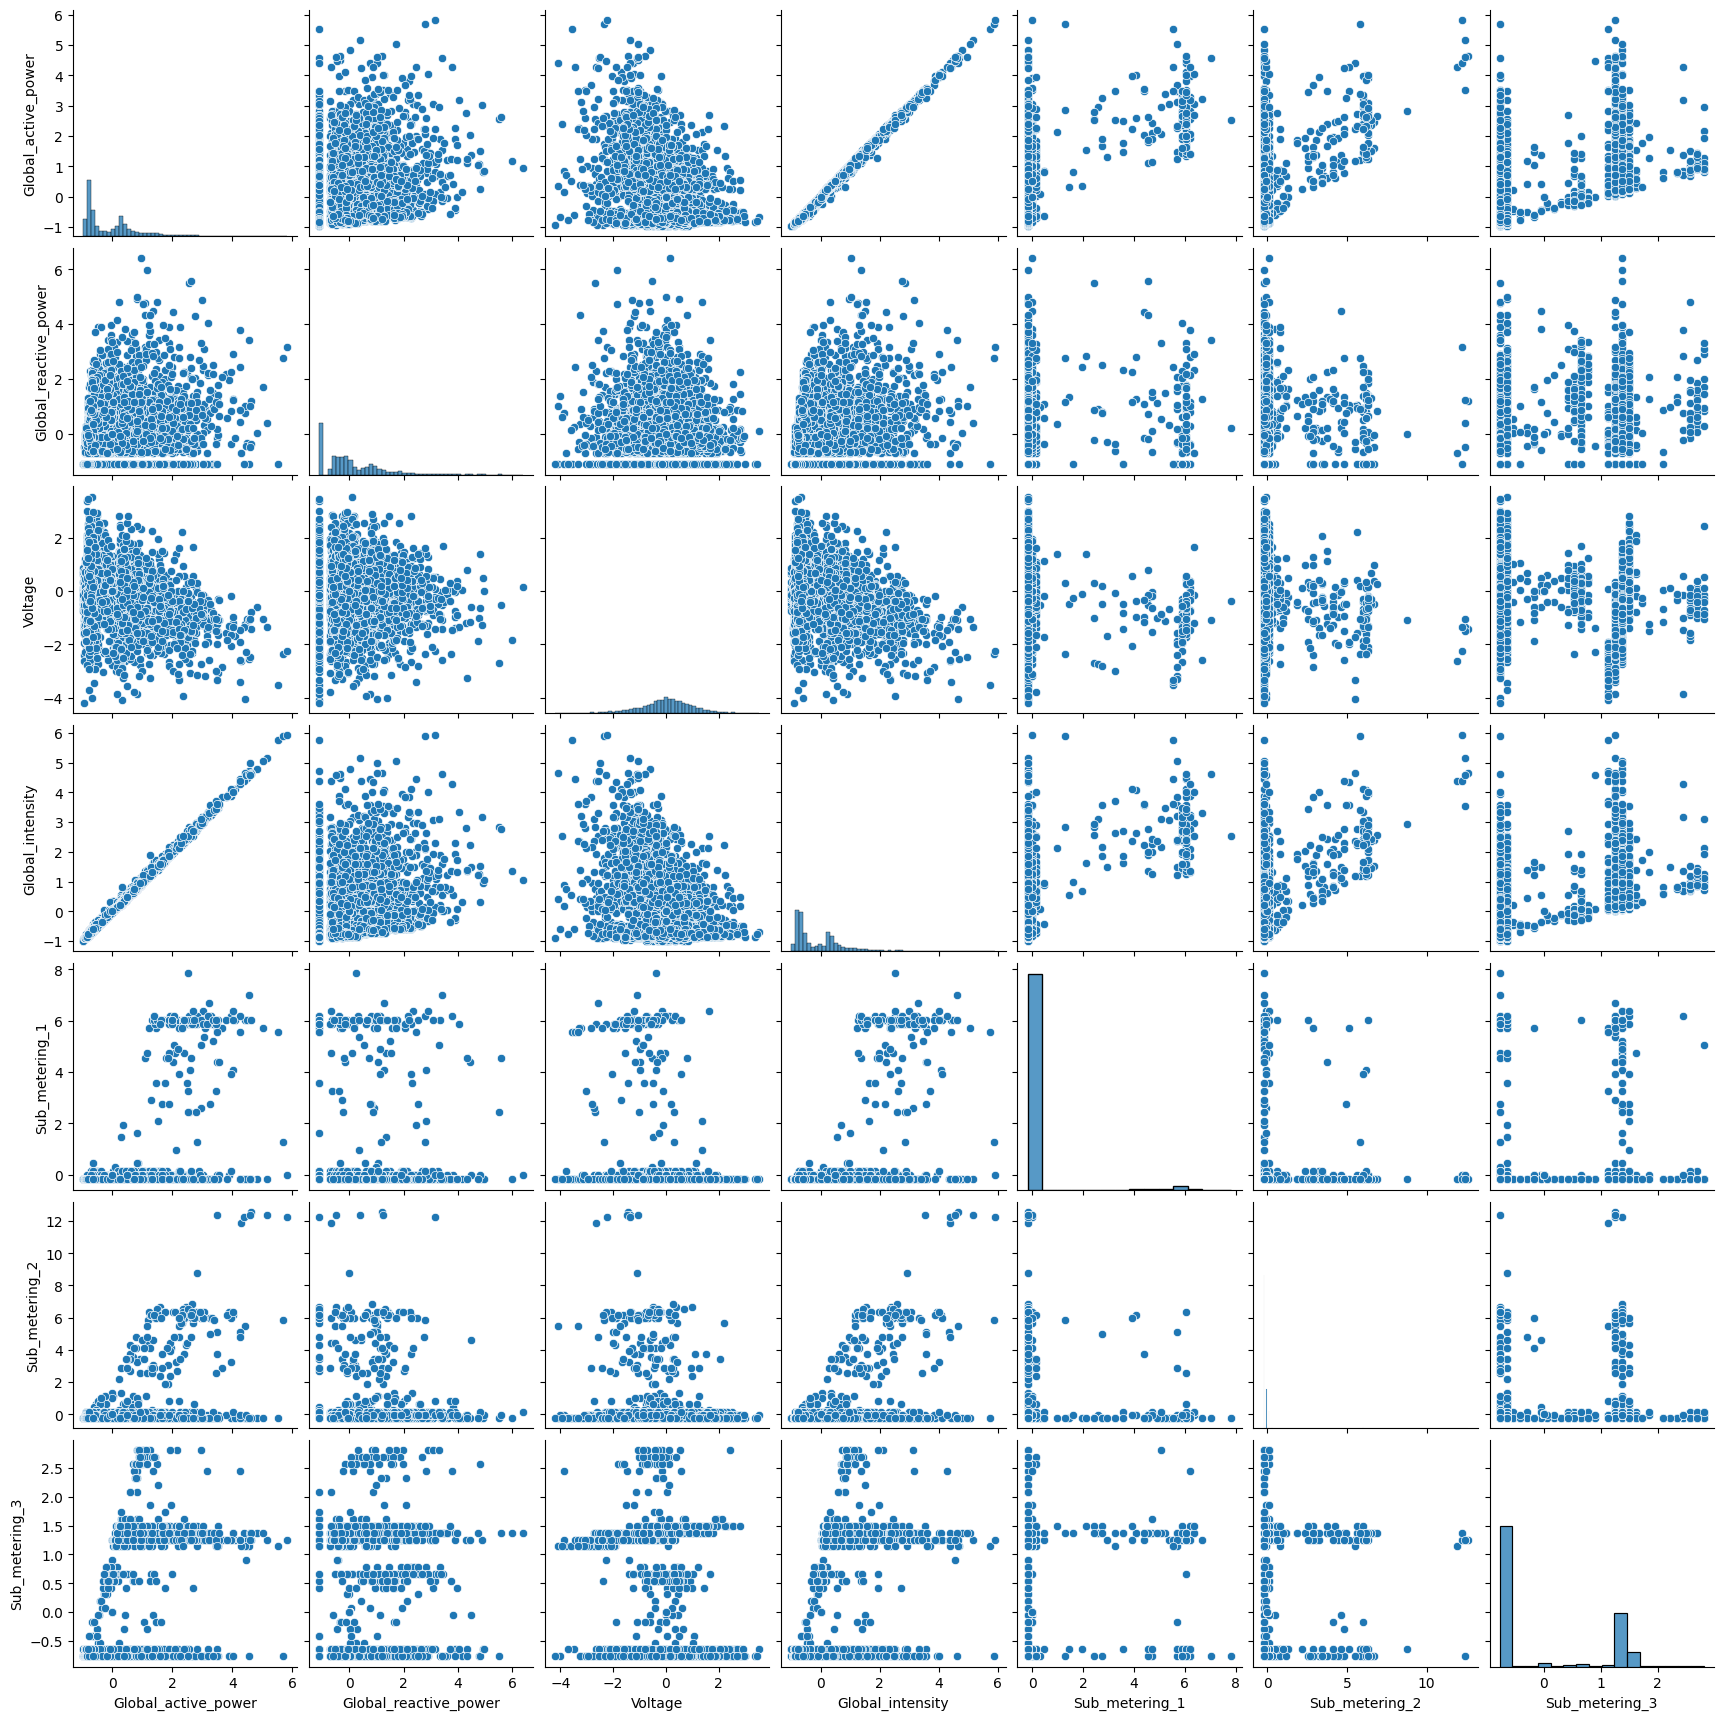

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Take a random sample (e.g., 5000 rows) to speed up visualization
sampled_data = check.sample(n=5000, random_state=42)

# Pairplot for numerical columns
sns.pairplot(sampled_data)
plt.show()


In [17]:
print(check.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


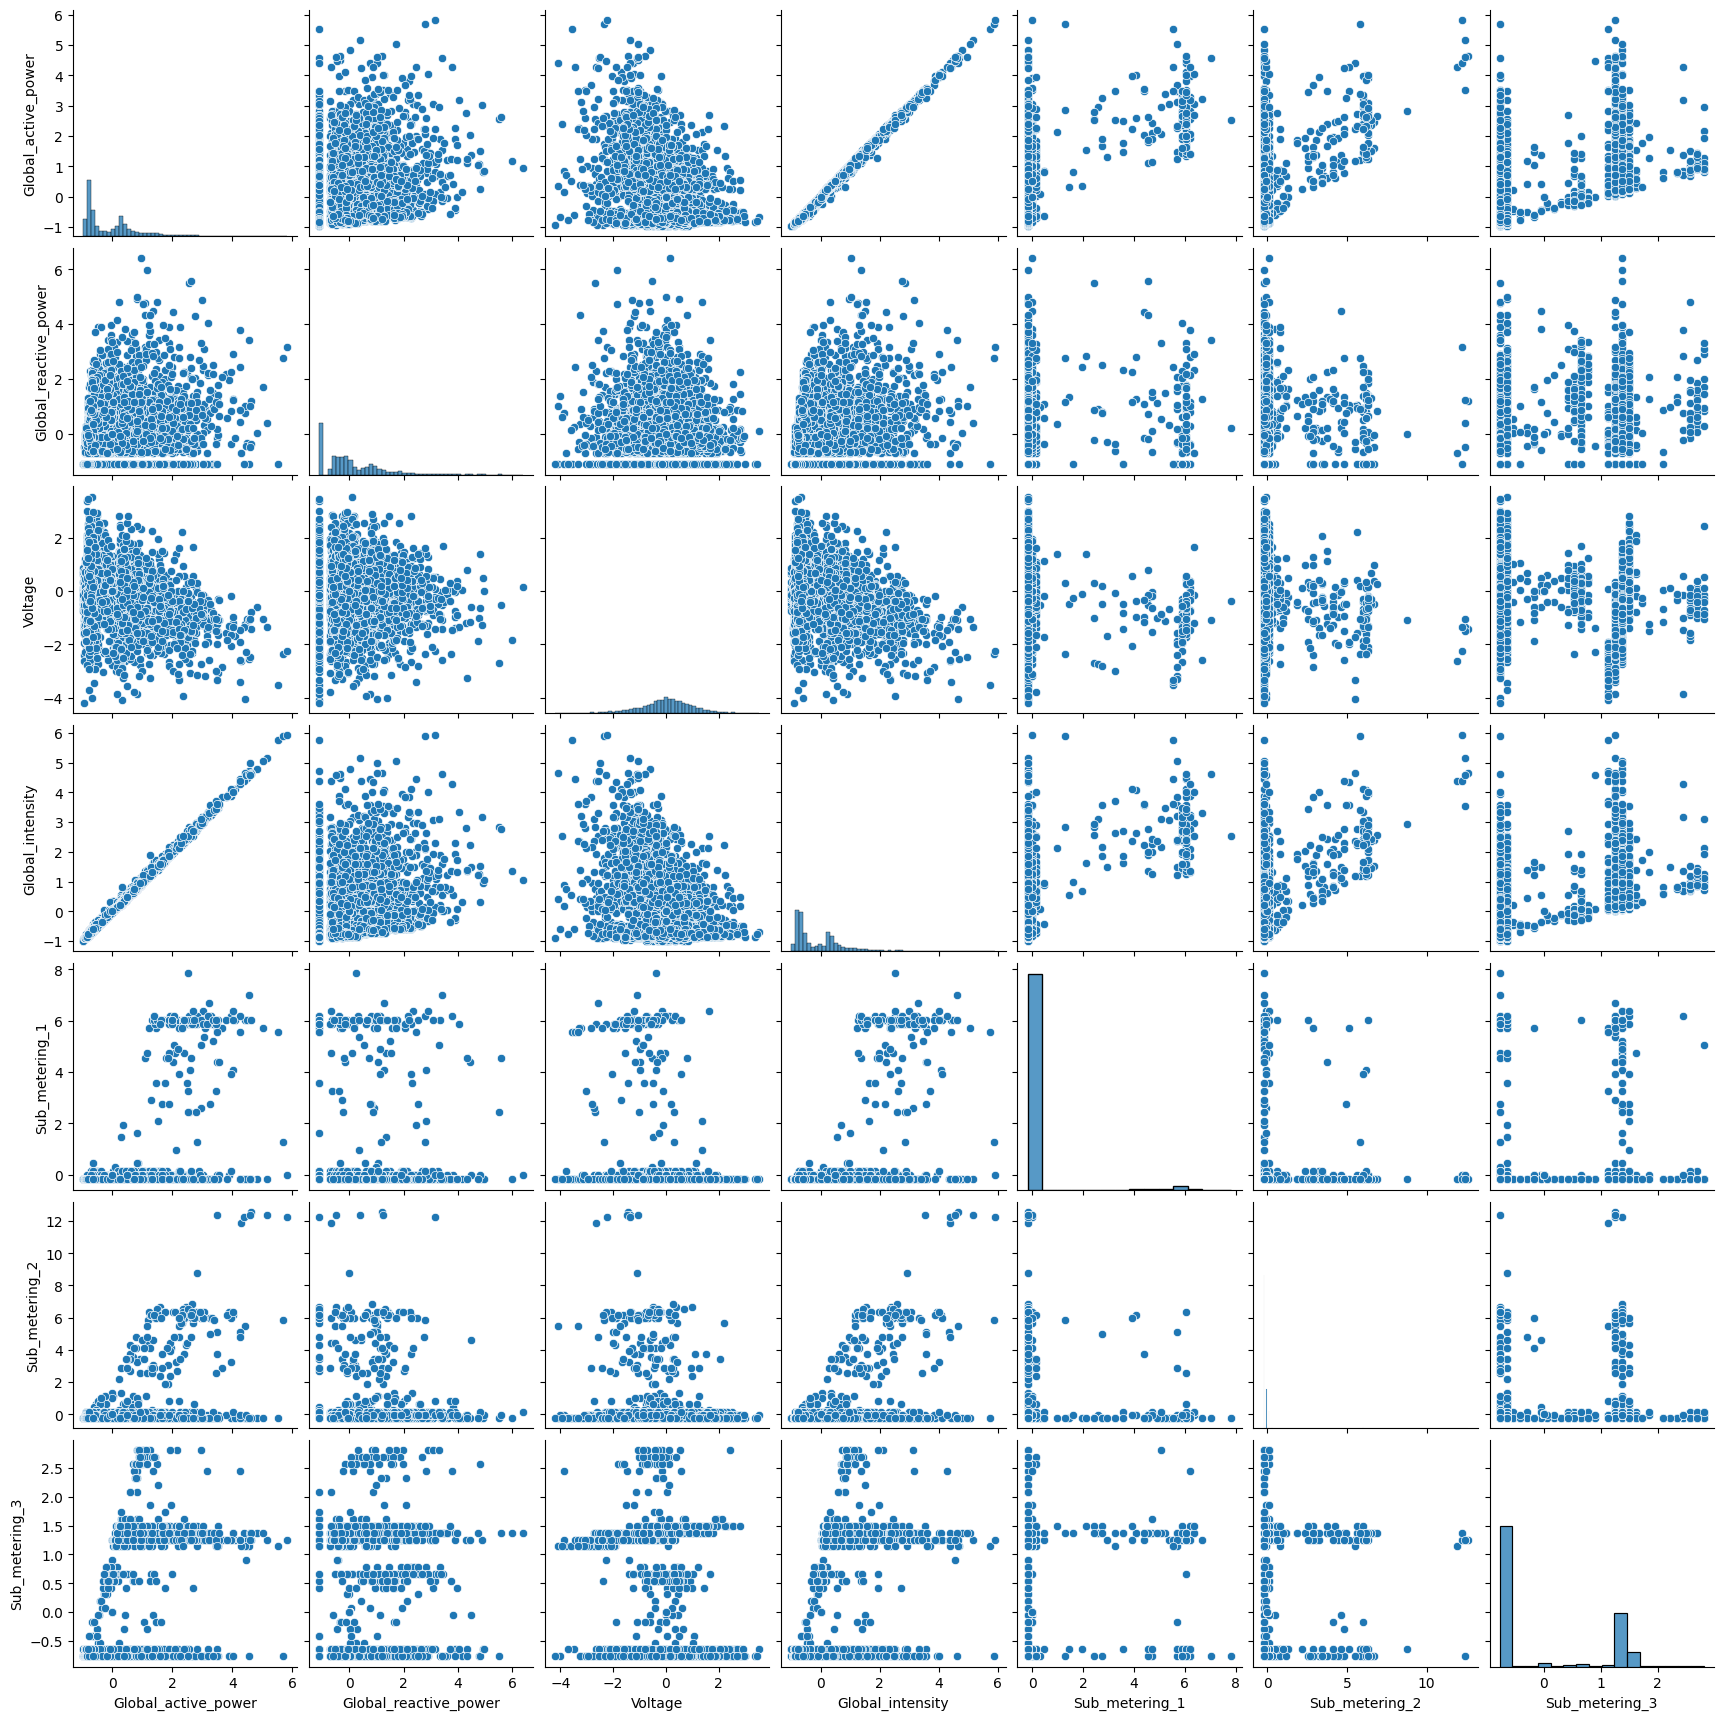

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


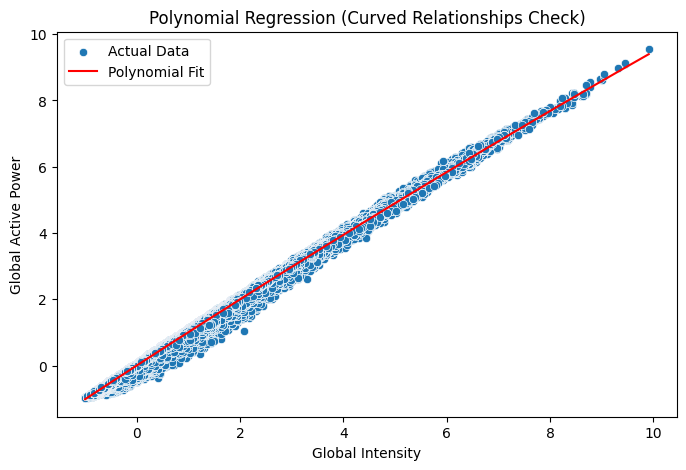

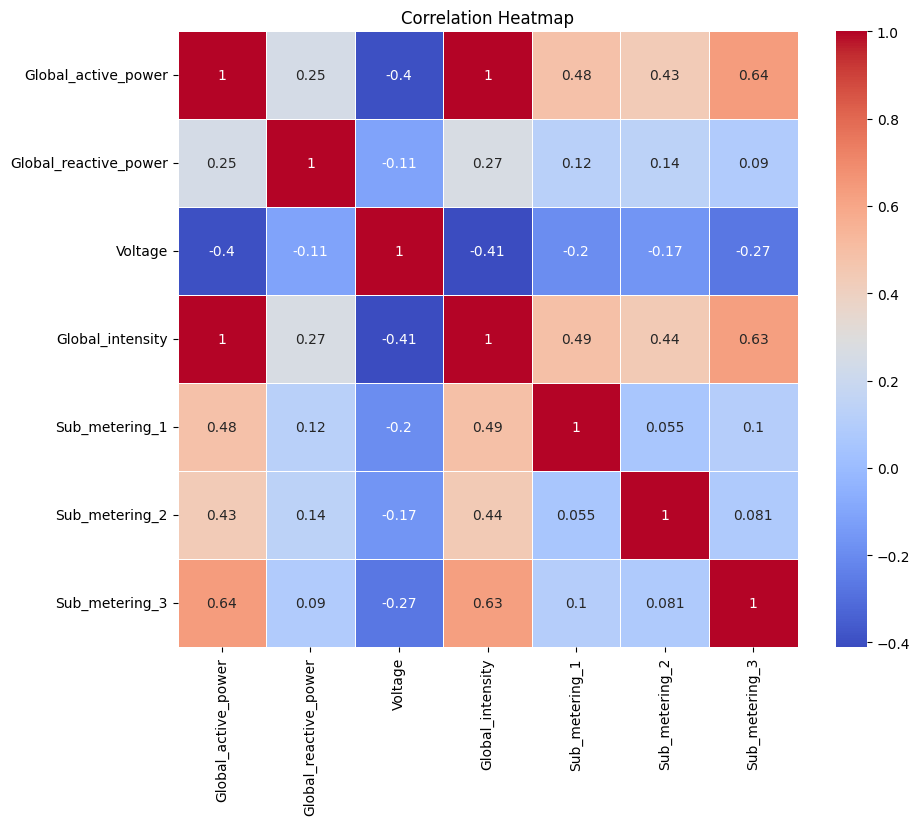


Variance Inflation Factor (VIF):
                 Feature       VIF
0  Global_reactive_power  1.089890
1                Voltage  1.204236
2       Global_intensity  3.863592
3         Sub_metering_1  1.607770
4         Sub_metering_2  1.494357
5         Sub_metering_3  2.111552


MemoryError: could not allocate 134217728 bytes

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

# 🔹 Load Data
# check = pd.read_csv("your_file.csv")  # Uncomment if loading from file

# 🔹 Take a Random Sample for Faster Visualization
sampled_data = check.sample(n=5000, random_state=42)  # Adjust sample size if needed

# 🔹 1. Check Linearity: Scatter Plots
sns.pairplot(sampled_data)
plt.show()

# 🔹 2. Check Curved Relationships: Polynomial Regression Plot
X = check["Global_intensity"].values.reshape(-1, 1)  # Change to your feature
y = check["Global_active_power"].values  # Target variable

poly = PolynomialFeatures(degree=2)  # Change degree to check different curves
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=check["Global_intensity"], y=check["Global_active_power"], label="Actual Data")
sns.lineplot(x=check["Global_intensity"], y=y_pred, color="red", label="Polynomial Fit")
plt.xlabel("Global Intensity")
plt.ylabel("Global Active Power")
plt.legend()
plt.title("Polynomial Regression (Curved Relationships Check)")
plt.show()

# 🔹 3. Check Multicollinearity: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(check.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 🔹 4. Check Variance Inflation Factor (VIF) for Multicollinearity
X_vif = check.drop(columns=["Global_active_power"])  # Exclude target column
X_vif = X_vif.dropna()  # Remove NaNs if any

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# 🔹 5. Check Non-Linearity & Interactions: Decision Tree Feature Importance
X = check.drop(columns=["Global_active_power"])
y = check["Global_active_power"]

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()



📊 Model Performance Metrics:
🔹 Train Accuracy (R² Score): 0.9985
🔹 Test Accuracy (R² Score): 0.9985
🔹 Train MSE: 0.0015 | Test MSE: 0.0015
🔹 Train RMSE: 0.0385 | Test RMSE: 0.0383
🔹 Train MAE: 0.0244 | Test MAE: 0.0244


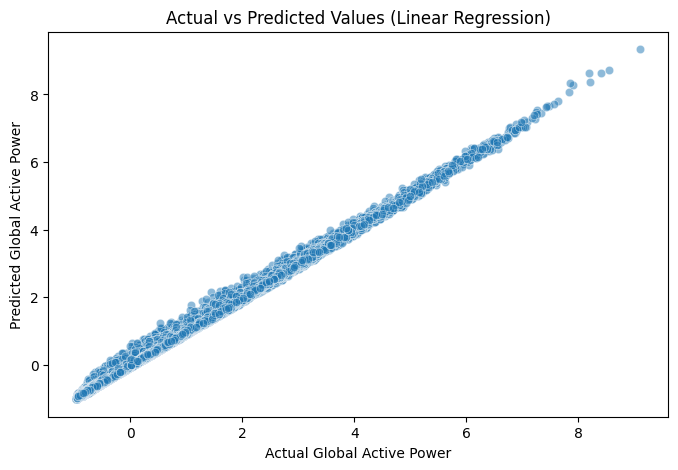


📊 Classification Metrics:
🔹 Accuracy Score: 0.9960
🔹 F1 Score: 0.9953


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score


# 🔹 Define Features (X) and Target (y)
X = check.drop(columns=["Global_active_power"])  # All features except target
y = check["Global_active_power"]  # Target variable

# 🔹 Split Data into Train & Test Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 🔹 Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 🔹 Calculate Regression Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)  # 🔹 Train Accuracy
r2_test = r2_score(y_test, y_test_pred)  # 🔹 Test Accuracy

# 🔹 Display Regression Metrics
print("\n📊 Model Performance Metrics:")
print(f"🔹 Train Accuracy (R² Score): {r2_train:.4f}")
print(f"🔹 Test Accuracy (R² Score): {r2_test:.4f}")
print(f"🔹 Train MSE: {mse_train:.4f} | Test MSE: {mse_test:.4f}")
print(f"🔹 Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")
print(f"🔹 Train MAE: {mae_train:.4f} | Test MAE: {mae_test:.4f}")

# 🔹 Scatter Plot: Actual vs Predicted Values (Test Set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()

# 🔹 Convert Predictions to Binary Labels for Classification Metrics
y_test_binary = np.where(y_test > y_test.mean(), 1, 0)  # Convert target into 0 & 1
y_test_pred_binary = np.where(y_test_pred > y_test.mean(), 1, 0)

# 🔹 Calculate Classification Metrics
accuracy = accuracy_score(y_test_binary, y_test_pred_binary)
f1 = f1_score(y_test_binary, y_test_pred_binary)

# 🔹 Display Classification Metrics
print("\n📊 Classification Metrics:")
print(f"🔹 Accuracy Score: {accuracy:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")
